### Joshua Campos
## Lab Course Machine Learning
## Exercise 11

Import all necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from libsvm.svmutil import *
from sklearn.datasets import load_svmlight_file
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Define all the functions that will be used for the K-Means Clustering algorithm. 

In [2]:
def select_random_datapoint(dataset):
    num_samples = len(dataset)
    random_index = np.random.randint(0,num_samples)
    sample = dataset.iloc[random_index,:]
    return sample

def calculate_distances(dataset,datapoint):
    rows = dataset.shape[0]
    columns = dataset.shape[1]
    total_distances = []
    
    for row in range(rows):
        distance_arr = []
        for column in range(columns-1): #CHANGE HERE -1
            distance = abs(dataset.iloc[row,column] - datapoint[column])
            distance_arr.append(distance)
        sample_distance = np.sum(distance_arr)
        total_distances.append(sample_distance)
            
    return np.array(total_distances)

def get_max_distance_datapoint(dataset,distance_arr):
    max_dist = np.max(distance_arr)
    max_dist_index = np.where(distance_arr == max_dist)[0][0]
    max_dist_sample = dataset.iloc[max_dist_index,:]
    return max_dist_sample

def define_centroids(dataset,k):
    centroids = []
    dist_matrix = np.array([])
    new_centroid = select_random_datapoint(dataset)
    centroids.append(new_centroid)
    dist_arr = calculate_distances(dataset,new_centroid)
    dist_matrix = np.concatenate((dist_matrix,dist_arr))
    
    for i in range(k-1):
        if i == 0:
            dist_matrix_sum = dist_matrix
        else:
            dist_matrix_sum = np.sum(dist_matrix,axis=0)
        for each in centroids:
            centroid_name = each.name
            dist_matrix_sum[centroid_name] = 0
        next_centroid = get_max_distance_datapoint(dataset,dist_matrix_sum)
        centroids.append(next_centroid)
        dist_arr = calculate_distances(dataset,next_centroid)
        dist_matrix = np.vstack((dist_matrix,dist_arr))
    
    return centroids

def assign_clusters(dataset,centroids_arr):
    num_rows = dataset.shape[0]
    num_columns = dataset.shape[1]
    cluster_assignment = []

    for row in range(num_rows):
        distance_arr = np.array([])
        for c in centroids_arr:
            distance = 0
            for column in range(num_columns-1): #CHANGE HERE -1
                distance += abs(dataset.iloc[row,column] - c[column])
            distance_arr = np.append(distance_arr,distance)
        min_dist = np.min(distance_arr)
        min_dist_index = np.where(distance_arr == min_dist)[0][0]
        cluster_assignment.append(min_dist_index)
    
    return cluster_assignment

def get_cluster_centroids(dataset,k):
    new_centroids = []
    for cluster in range(k):
        clustered_data = dataset[dataset['cluster'] == cluster]
        grouped_dist = []
        for row in range(len(clustered_data)):
            current_row = clustered_data.iloc[row,:]
            dist_arr = calculate_distances(clustered_data,current_row)
            dist_sum = np.sum(dist_arr)
            grouped_dist.append(dist_sum)
        min_dist = np.min(grouped_dist)
        min_dist_index = np.where(grouped_dist == min_dist)[0][0]
        mean_centroid = clustered_data.iloc[min_dist_index,:]
        new_centroids.append(mean_centroid)
    
    return new_centroids

def compare_centroids(old_centroids,new_centroids,k):
    old_centroids_names = []
    new_centroids_names = []
    for i in range(k):
        old_centroids_names.append(old_centroids[i].name)
        new_centroids_names.append(new_centroids[i].name)
    same_centroids = old_centroids_names == new_centroids_names
    return same_centroids

Define the main function that will perform the K-Means Clustering.

In [3]:
def cluster_kmeans(dataset,k):
    centroids = define_centroids(dataset,k)
    cluster_assignment = assign_clusters(dataset,centroids)
    dataset['cluster'] = cluster_assignment
    
    same_centroids = False
    while same_centroids == False:
        new_centroids = get_cluster_centroids(dataset,k)
        cluster_assignment = assign_clusters(dataset,new_centroids)
        dataset['cluster'] = cluster_assignment
        same_centroids = compare_centroids(centroids,new_centroids,k)
        centroids = new_centroids
        
    return dataset

### Exercise 1: Implement K Means Clustering Algorithm

Read the iris dataset in LibSVM format and convert it into a dataframe. Then print the head of the dataframe to understand the structure of the data.

In [4]:
iris_svm = load_svmlight_file('iris.dat')

X = iris_svm[0]
y = iris_svm[1]

iris_dataset = pd.DataFrame(X.todense())

iris_dataset.head()

,0,1,2,3
0,-0.555556,0.250000,-0.864407,-0.916667
1,-0.666667,-0.166667,-0.864407,-0.916667
2,-0.777778,0.000000,-0.898305,-0.916667
3,-0.833333,-0.083333,-0.830508,-0.916667
4,-0.611111,0.333333,-0.864407,-0.916667


Execute the K-Means Clustering algorithm on the iris dataset and then print the head of the dataframe with the assigned cluster numbers. We decide to use a 'k' of three, because we know that the dataset has three types of iris, so it's better to check this way if our algorithm is performing well.

In [5]:
clustered_data = cluster_kmeans(iris_dataset,3)
clustered_data.head()

,0,1,2,3,cluster
0,-0.555556,0.250000,-0.864407,-0.916667,2
1,-0.666667,-0.166667,-0.864407,-0.916667,2
2,-0.777778,0.000000,-0.898305,-0.916667,2
3,-0.833333,-0.083333,-0.830508,-0.916667,2
4,-0.611111,0.333333,-0.864407,-0.916667,2


Now we plot the dataset, before and after the clustering; first on sepal length and width, and then on petal length and width. We can clearly see how the clustering algorithm did a good job separating the three types of iris.

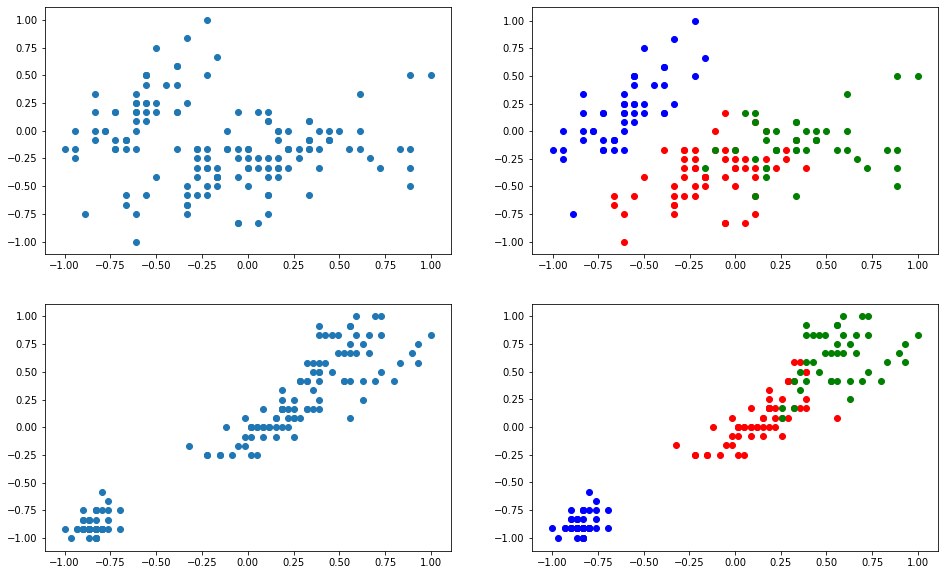

In [6]:
color_arr = ['r','g','b']

plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.scatter(iris_dataset[0],iris_dataset[1])

plt.subplot(2,2,2)
for i in range(3):
    plt.scatter(clustered_data[0][clustered_data['cluster'] == i],
                clustered_data[1][clustered_data['cluster'] == i],c=color_arr[i])
    
plt.subplot(2,2,3)
plt.scatter(iris_dataset[2],iris_dataset[3])

plt.subplot(2,2,4)
for i in range(3):
    plt.scatter(clustered_data[2][clustered_data['cluster'] == i],
                clustered_data[3][clustered_data['cluster'] == i],c=color_arr[i])

#### Difference Between K-Means and KNN.

KNN is a supervised algorithm used for classification, which means that we have data with its corresponding labels. KNN takes into account a 'k' number of neighbors in order to make the prediction for the current datapoint, which we can later check the accuracy of our model. 

K-Means is an unsupervised algorithm used for clustering, which means that we have data with no labels. K-Means takes into account the mean distance between the datapoints to create a 'k' number of clusters. For this type of algorithm we can't check the accuracy, as we don't have labels to compare.

### Exercise 2: Cluster News Articles

We read the directory where we have all the news files, and get the categories. 

In [7]:
train_directory = '20news-bydate/20news-bydate-train/'
test_directory = '20news-bydate/20news-bydate-test/'

news_categories = os.listdir(train_directory)
news_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We start looping across the files, reading them, and inserting them into lists to create our training and testing set. 

In [8]:
X_train = []
y_train = []

for category in news_categories:
    category_directory = train_directory+category+'/'
    for filename in os.listdir(category_directory):
        file_directory = category_directory+filename
        file = open(file_directory, "r")
        text = file.read()
        text_words = text.split()
        clean_text = ' '.join(text_words)
        X_train.append(clean_text)
        y_train.append(category)
        
X_test = []
y_test = []

for category in news_categories:
    category_directory = test_directory+category+'/'
    for filename in os.listdir(category_directory):
        file_directory = category_directory+filename
        file = open(file_directory, "r")
        text = file.read()
        text_words = text.split()
        clean_text = ' '.join(text_words)
        X_test.append(clean_text)
        y_test.append(category)

We convert the lists into arrays and then into dataframes, so we can use the data in the algorithm. Then we print the head to see how the data is structured.

In [9]:
X_train_arr = np.array(X_train).reshape(-1,1)
X_test_arr = np.array(X_test).reshape(-1,1)

X_train_df = pd.DataFrame(X_train_arr)
X_test_df = pd.DataFrame(X_test_arr)

X_train_df.head()

,0
0,From: mathew <mathew@mantis.co.uk> Subject: Al...
1,From: mathew <mathew@mantis.co.uk> Subject: Al...
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
3,From: mathew <mathew@mantis.co.uk> Subject: Re...
4,From: strom@Watson.Ibm.Com (Rob Strom) Subject...


We use TFIDF Vectorizer so we can convert the mails into numbers, so we can process the data. 

In [10]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train_df[0])
X_test_tfidf = vectorizer.transform(X_test_df[0])

We use the MultinomialNB to cluster our data.

In [11]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

We get the predictions for the train and test set.

In [12]:
train_predicted = mnb_model.predict(X_train_tfidf)
test_predicted = mnb_model.predict(X_test_tfidf)

We check the accuracy for both predictions with the used model, which performed really well. 

In [13]:
train_acc = accuracy_score(y_train,train_predicted)
test_acc = accuracy_score(y_test,test_predicted)

print('Train Accuracy: {}\nTest Accuracy: {}'.format(train_acc,test_acc))

Train Accuracy: 0.9573979140887396
Test Accuracy: 0.8169144981412639


The MultinomialNB ran really quickly, however with the created algorithm, we couldn't run the algorithm, as it took over one hour and it didn't converge. 